In [7]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Função para extrair dados da tabela
def extrair_dados(url):
    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'}
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, 'html.parser')

    # Encontrar a tabela com id 'pos_onglet'
    table = soup.find('table', id='pos_onglet')
    data = []
    if table:
        rows = table.find_all('tr')
        for row in rows:
            cols = row.find_all('td')
            data.append([col.text.strip() for col in cols])
    return data

# URL base
url_base = "http://www.cazy.org/search?page=recherche&recherche=&tag=12&debut_ligand="

# Lista para armazenar os dados
todos_os_dados = []

# Loop para as diferentes páginas
for page in range(0, 100, 100):  # Começa em 0 e vai até 11800 com intervalo de 100
    url = url_base + str(page)
    dados = extrair_dados(url)
    todos_os_dados.extend(dados)

# Criar o DataFrame sem especificar colunas
df = pd.DataFrame(todos_os_dados)

# Exibir as primeiras linhas do DataFrame
print(df.head())

Empty DataFrame
Columns: []
Index: []


In [10]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Função para extrair dados da tabela
def extrair_dados(url):
    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'}
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, 'html.parser')

    # Encontrar a tabela com id 'pos_onglet'
    table = soup.find('table', id='pos_onglet')
    data = []
    if table:
        rows = table.find_all('tr')
        for row in rows:
            cols = row.find_all('td')
            if cols:  # Certifique-se de que há colunas na linha
                data.append([col.text.strip() for col in cols])
    return data

def extrair_dados(url):
    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'}
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, 'html.parser')

    # Para depuração: imprimir o conteúdo da página
    print(soup.prettify())  # Exibe o HTML bem formatado para inspeção

    # Procurar pela tabela
    table = soup.find('table', id='pos_onglet')
    data = []
    if table:
        rows = table.find_all('tr')
        for row in rows:
            cols = row.find_all('td')
            if cols:
                data.append([col.text.strip() for col in cols])
    return data


# URL base
url_base = "http://www.cazy.org/search?page=recherche&recherche=&tag=12&debut_ligand="

# Lista para armazenar os dados
todos_os_dados = []

# Loop para as diferentes páginas
for page in range(0, 11800, 100):  # Começa em 0 e vai até 11800 com intervalo de 100
    url = url_base + str(page)
    dados = extrair_dados(url)
    if not dados:  # Interrompa o loop se não houver mais dados
        print(f"Sem dados na página: {url}")
        break
    todos_os_dados.extend(dados)

# Criar o DataFrame sem especificar colunas
df = pd.DataFrame(todos_os_dados)

# Exibir as primeiras linhas do DataFrame
print(df.head())


<!DOCTYPE HTML PUBLIC "-//IETF//DTD HTML 2.0//EN">
<html>
 <head>
  <title>
   404 Not Found
  </title>
 </head>
 <body>
  <h1>
   Not Found
  </h1>
  <p>
   The requested URL was not found on this server.
  </p>
  <hr/>
  <address>
   Apache/2.4.59 (Debian) Server at www.cazy.org Port 80
  </address>
 </body>
</html>

Sem dados na página: http://www.cazy.org/search?page=recherche&recherche=&tag=12&debut_ligand=0
Empty DataFrame
Columns: []
Index: []


In [12]:
cazy_df = df.iloc[1:, :7]

In [9]:
cazy_df.to_csv('/home/douglas/cazy_df.csv')

In [1]:
#Read
import pandas as pd
cazy_df = pd.read_csv('/home/douglas/cazy_df.csv')
cazy_df.columns = cazy_df.iloc[0]  # Define a primeira linha como cabeçalho
cazy_df = cazy_df[1:].reset_index(drop=True)
cazy_df = cazy_df[~cazy_df.iloc[:, 1].str.contains('page précédente', na=False)]

In [2]:
#Verif

cazy_df = cazy_df.drop(columns=['Carbohydrate Ligands', 'EC'])

In [32]:
#Read CSV new
import pandas as pd
piranose_df = pd.read_csv("/home/douglas/carboanalysis/carboanalysis/pdb/dataframes/puckering/piranoses_new.csv")

In [33]:
#Link

#Transformando a coluna 'sugar' para comparação
# Mantendo apenas os 4 primeiros caracteres e convertendo para letras minúsculas
piranose_df['sugar_entry'] = piranose_df['sugar'].str[:4].str.lower()
cazy_df['PDB/3D'] = cazy_df['PDB/3D'].str[:4].str.lower()

# Selecionando as colunas necessárias para o merge
cazy_subset = cazy_df[['PDB/3D', 'Protein Name', 'Family']]

# Realizando o merge para adicionar a classificação ao piranose_df
piranose_df = piranose_df.merge(
    cazy_subset,
    how='left',  # Mantém todas as linhas do piranose_df
    left_on='sugar_entry',
    right_on='PDB/3D'
)

# Removendo a coluna extra 'PDB/3D' (opcional)
piranose_df = piranose_df.drop(columns=['PDB/3D'])

# Exibindo o DataFrame final
print(piranose_df)
piranose_clean_df = piranose_df.dropna()


       Unnamed: 0.3  Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0           sugar  \
0                 0             0             0           0  1uhg_NAG_11983   
1                 1             1             1           1   6zho_GLC_4663   
2                 2             2             2           2   6xql_GLC_2019   
3                 3             3             3           3  1hjs_NAG_10514   
4                 4             4             4           4   7vin_NAG_4824   
...             ...           ...           ...         ...             ...   
34742         34702         34702         34702       34702   3gdn_MAN_8064   
34743         34703         34703         34703       34703   6ze7_NAG_9355   
34744         34704         34704         34704       34704   1o8a_NAG_4689   
34745         34705         34705         34705       34705  4wk0_NAG_13481   
34746         34706         34706         34706       34706  4x83_NAG_24226   

       time   puck.qx   puck.qy   puck.qz  puck.phi

In [34]:
piranose_clean_df.to_csv("/home/douglas/carboanalysis/carboanalysis/pdb/dataframes/puckering/piranoses_clean_family_and_protein_name_entry_name.csv")

In [ ]:
#Link

#Transformando a coluna 'sugar' para comparação
# Mantendo apenas os 4 primeiros caracteres e convertendo para letras minúsculas
piranose_entries = piranose_df['sugar'].str[:4].str.lower()
cazy_entries = cazy_df['PDB/3D'].str[:4].str.lower()

isin = piranose_entries.isin(cazy_entries)

print(isin.sum())


In [ ]:
cazy_df = cazy_df[cazy_df.iloc[:, 1].notna()]
cazy_df.to_csv('/home/douglas/cazy_df_sla.csv')
#cazy_df = cazy_df[cazy_df.iloc[:, 2] <= 2.0]

In [2]:
import pandas as pd

df = pd.read_csv('/home/douglas/carboanalysis/carboanalysis/pdb/dataframes/puckering/piranoses_new.csv')
df = df.iloc[:, 4:]

df.to_csv('/home/douglas/carboanalysis/carboanalysis/pdb/dataframes/puckering/piranoses_new_clean.csv')

In [ ]:
import pandas as pd

df = pd.read_csv('/home/douglas/carboanalysis/carboanalysis/pdb/dataframes/puckering/piranoses_clean_family_and_protein_name_entry_name.csv')
df = df.iloc[:, 4:]
# Remover todos os números da coluna
df['Family'] = df['Family'].str.replace('\d+', '', regex=True)

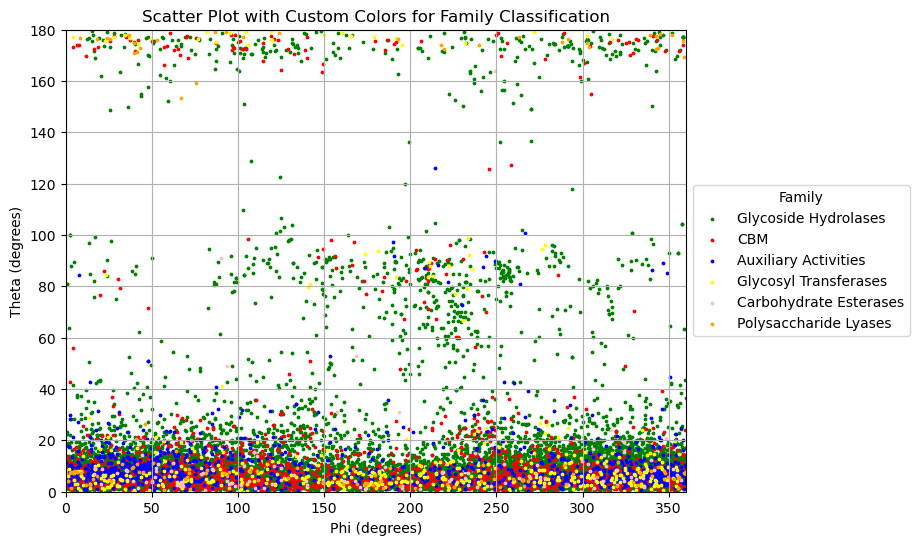

In [36]:
import pandas as pd
import matplotlib.pyplot as plt


# Criar o gráfico de dispersão
plt.figure(figsize=(8, 6))

# Dicionário para mapear as cores
color_dict = {
    'GH': 'green',
    'CBM': 'red',
    'AA': 'blue',
    'GT': 'yellow',
    'CE': 'pink',
    'PL': 'orange'
}

# Dicionário para mapear abreviações para nomes completos

full_names_dict = {
    'GH': 'Glycoside Hydrolases',
    'CBM': 'CBM',
    'AA': 'Auxiliary Activities',
    'GT': 'Glycosyl Transferases',
    'CE': 'Carbohydrate Esterases',
    'PL': 'Polysaccharide Lyases'
}

# Plotar cada classificação com sua cor correspondente
for family in color_dict.keys():
    subset = df[df['Family'] == family]
    plt.scatter(
        subset['puck.phi_graus'], 
        subset['puck.theta_graus'], 
        color=color_dict[family], 
        label=full_names_dict[family], 
        s=3  # Tamanho dos pontos
    )

# Configurar os eixos
plt.xlim([0, 360])
plt.ylim([0, 180])
plt.xlabel('Phi (degrees)')
plt.ylabel('Theta (degrees)')

# Adicionar a legenda
plt.legend(title='Family', loc='center left', bbox_to_anchor=(1, 0.5))

# Mostrar o gráfico
plt.title('Scatter Plot with Custom Colors for Family Classification')
plt.grid(True)  # Adicionar grade para melhor visualização
plt.show()


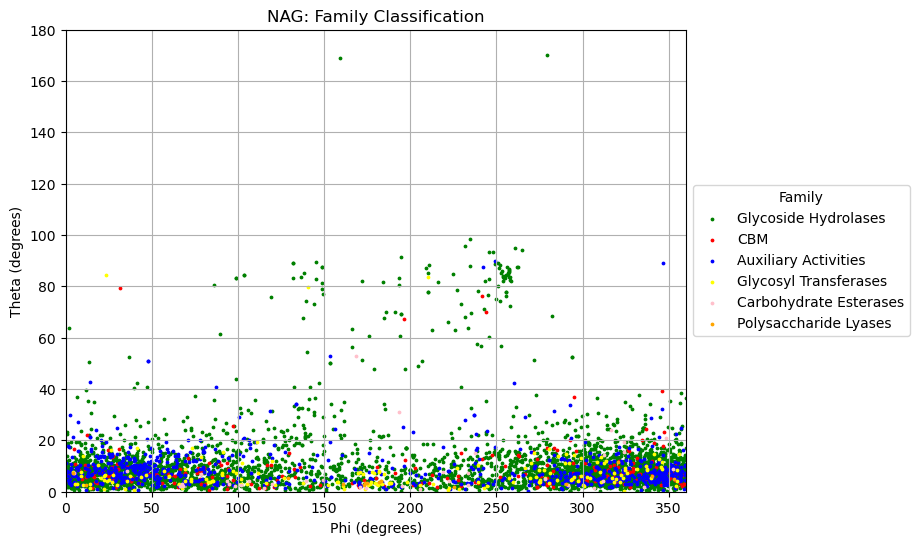

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

#NAG

mon_df = df[df['sugar'].str.contains('NAG', na=False)]

# Criar o gráfico de dispersão
plt.figure(figsize=(8, 6))

# Dicionário para mapear as cores
color_dict = {
    'GH': 'green',
    'CBM': 'red',
    'AA': 'blue',
    'GT': 'yellow',
    'CE': 'pink',
    'PL': 'orange'
}

# Dicionário para mapear abreviações para nomes completos

full_names_dict = {
    'GH': 'Glycoside Hydrolases',
    'CBM': 'CBM',
    'AA': 'Auxiliary Activities',
    'GT': 'Glycosyl Transferases',
    'CE': 'Carbohydrate Esterases',
    'PL': 'Polysaccharide Lyases'
}

# Plotar cada classificação com sua cor correspondente
for family in color_dict.keys():
    subset = mon_df[mon_df['Family'] == family]
    plt.scatter(
        subset['puck.phi_graus'], 
        subset['puck.theta_graus'], 
        color=color_dict[family], 
        label=full_names_dict[family], 
        s=3  # Tamanho dos pontos
    )

# Configurar os eixos
plt.xlim([0, 360])
plt.ylim([0, 180])
plt.xlabel('Phi (degrees)')
plt.ylabel('Theta (degrees)')

# Adicionar a legenda
plt.legend(title='Family', loc='center left', bbox_to_anchor=(1, 0.5))

# Mostrar o gráfico
plt.title('NAG: Family Classification')
plt.grid(True)  # Adicionar grade para melhor visualização
plt.show()


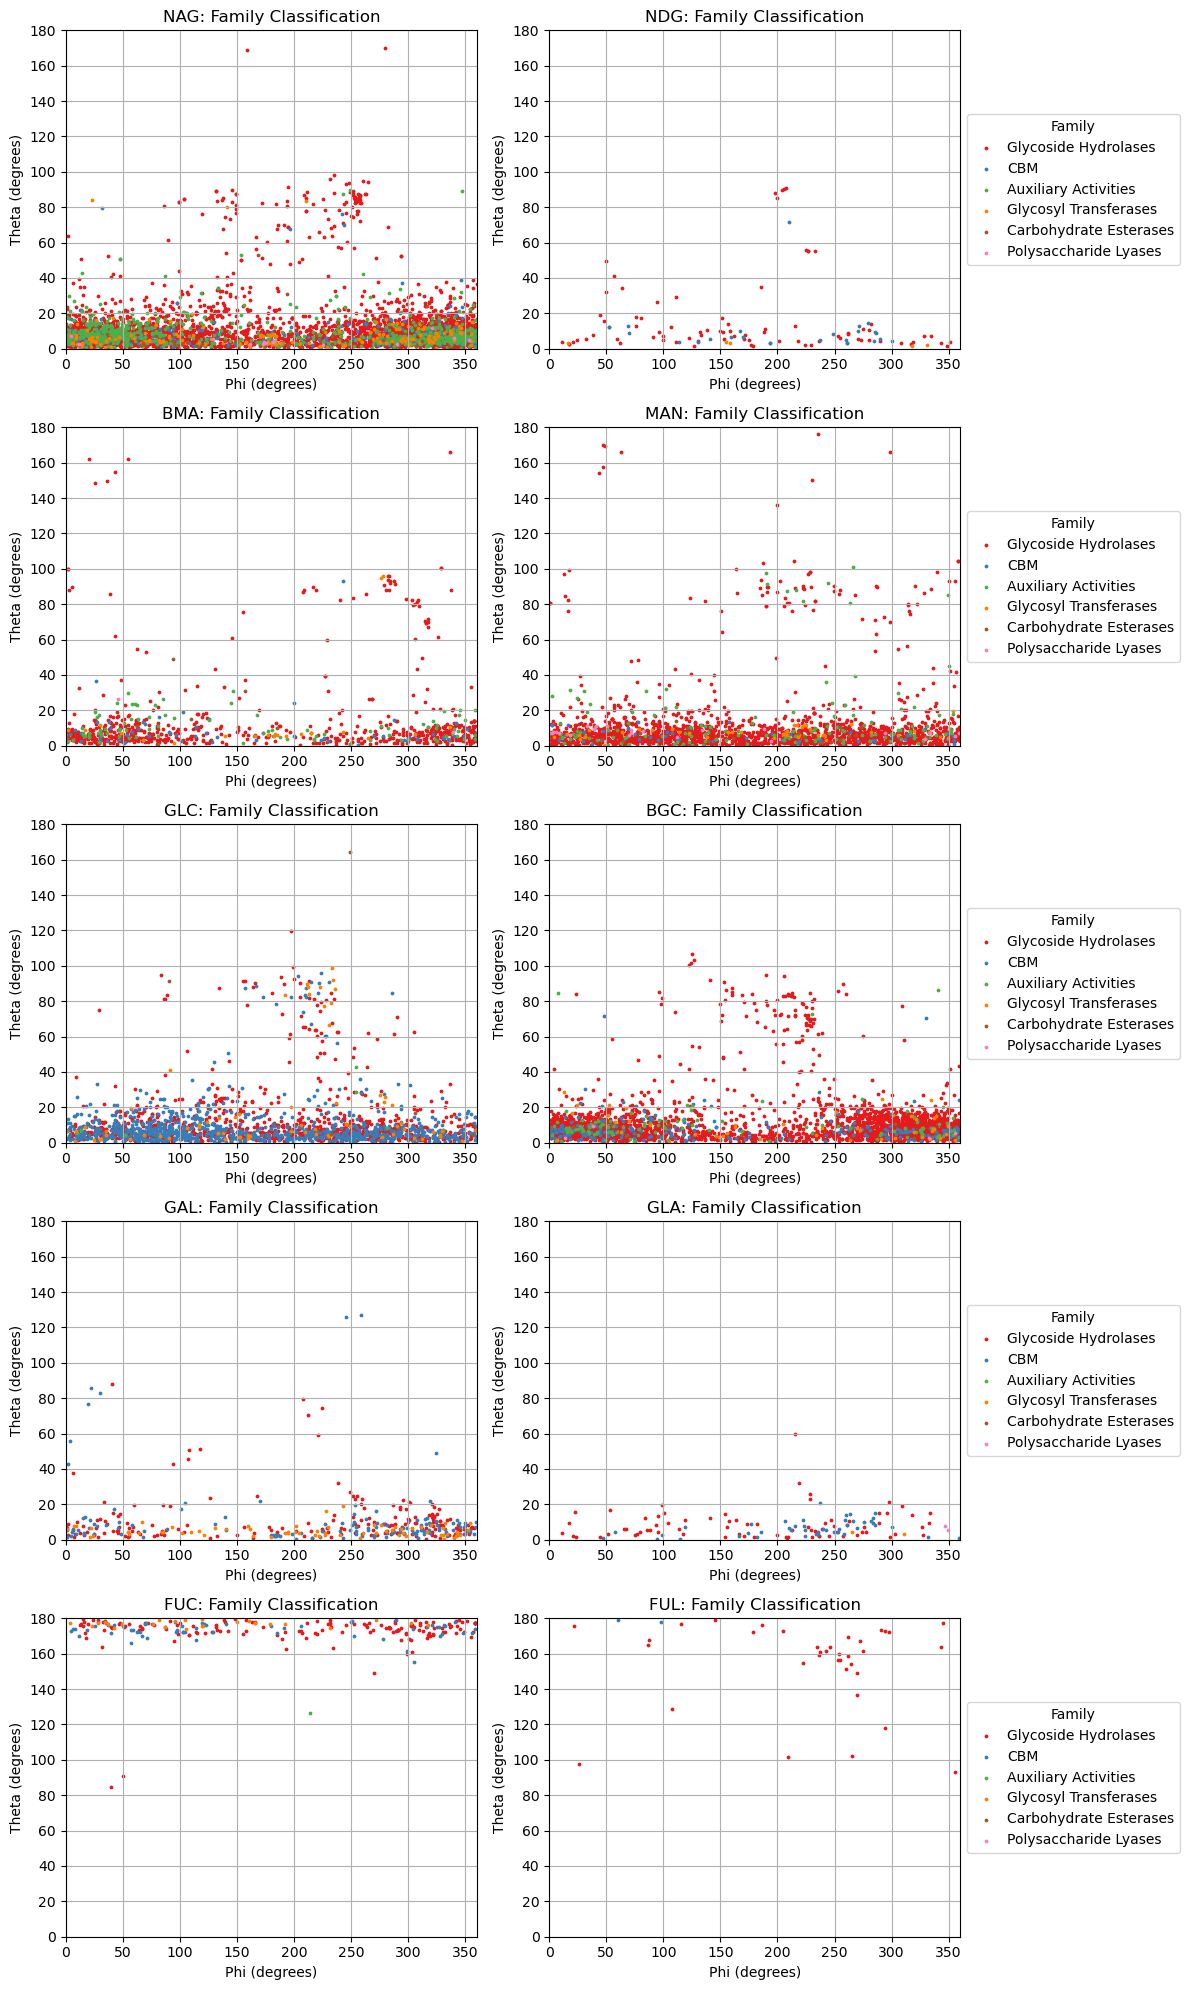

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Merge com iupac_names
iupac_names_df = pd.read_csv('/home/douglas/carboanalysis/carboanalysis/pdb/dataframes/iupac_names.txt', sep=';', header=None, names=['comp_id', 'iupac_name'])
df = pd.merge(df, iupac_names_df, on='comp_id', how='left')

#Junta alfa e beta
df['iupac_name'] = df['iupac_name'].str.replace(r'^(a-|b-)', '', regex=True)

# Lista de açúcares que você quer analisar
sugars = ['NAG', 'NDG', 'BMA', 'MAN', 'GLC', 'BGC', 'GAL', 'GLA', 'FUC', 'FUL']

# Criar uma figura com subplots
fig, axs = plt.subplots(5, 2, figsize=(12, 20))  # 5 linhas e 2 colunas
axs = axs.flatten() 
 # Facilita o acesso aos eixos

# Dicionário para mapear as cores
color_dict = {
    'GH': '#e41a1c',
    'CBM': '#377eb8',
    'AA': '#4daf4a',
    'GT': '#ff7f00',
    'CE': '#a65628',
    'PL': '#f781bf'
}

# Dicionário para mapear abreviações para nomes completos
full_names_dict = {
    'GH': 'Glycoside Hydrolases',
    'CBM': 'CBM',
    'AA': 'Auxiliary Activities',
    'GT': 'Glycosyl Transferases',
    'CE': 'Carbohydrate Esterases',
    'PL': 'Polysaccharide Lyases'
}

# Loop através dos açúcares e plotar em cada subplot
for i, sugar in enumerate(sugars):
    mon_df = df[df['sugar'].str.contains(sugar, na=False)]
    
    # Armazenar handles de legenda
    legend_handles = []
    
    # Plotar cada classificação com sua cor correspondente
    for family in color_dict.keys():
        subset = mon_df[mon_df['Family'] == family]
        scatter = axs[i].scatter(
            subset['puck.phi_graus'], 
            subset['puck.theta_graus'], 
            color=color_dict[family], 
            s=3,  # Tamanho dos pontos
            label=full_names_dict[family]  # Definindo rótulo
        )
        legend_handles.append(scatter)  # Adicionar o artista à lista de handles
    
    # Configurar os eixos
    axs[i].set_xlim([0, 360])
    axs[i].set_ylim([0, 180])
    axs[i].set_xlabel('Phi (degrees)')
    axs[i].set_ylabel('Theta (degrees)')
    
    # Adicionar o título para cada gráfico
    axs[i].set_title(f'{sugar}: Family Classification')
    axs[i].grid(True)  # Adicionar grade para melhor visualização

    # Adicionar a legenda apenas nos gráficos da segunda coluna
    if i % 2 == 1:  # Verifica se o índice é ímpar (segunda coluna)
        axs[i].legend(title='Family', loc='center left', bbox_to_anchor=(1, 0.5), handletextpad=0.5)

# Ajustar o layout
plt.tight_layout()
plt.show()


In [8]:
# Separar a sigla dos açúcares
df['comp_id'] = df['sugar'].str.split('_').str[1]

# Merge com iupac_names
iupac_names_df = pd.read_csv('/home/douglas/carboanalysis/carboanalysis/pdb/dataframes/iupac_names.txt', sep=';', header=None, names=['comp_id', 'iupac_name'])
df = pd.merge(df, iupac_names_df, on='comp_id', how='left')

#Junta alfa e beta
df['iupac_name'] = df['iupac_name'].str.replace(r'^(a-|b-)', '', regex=True)

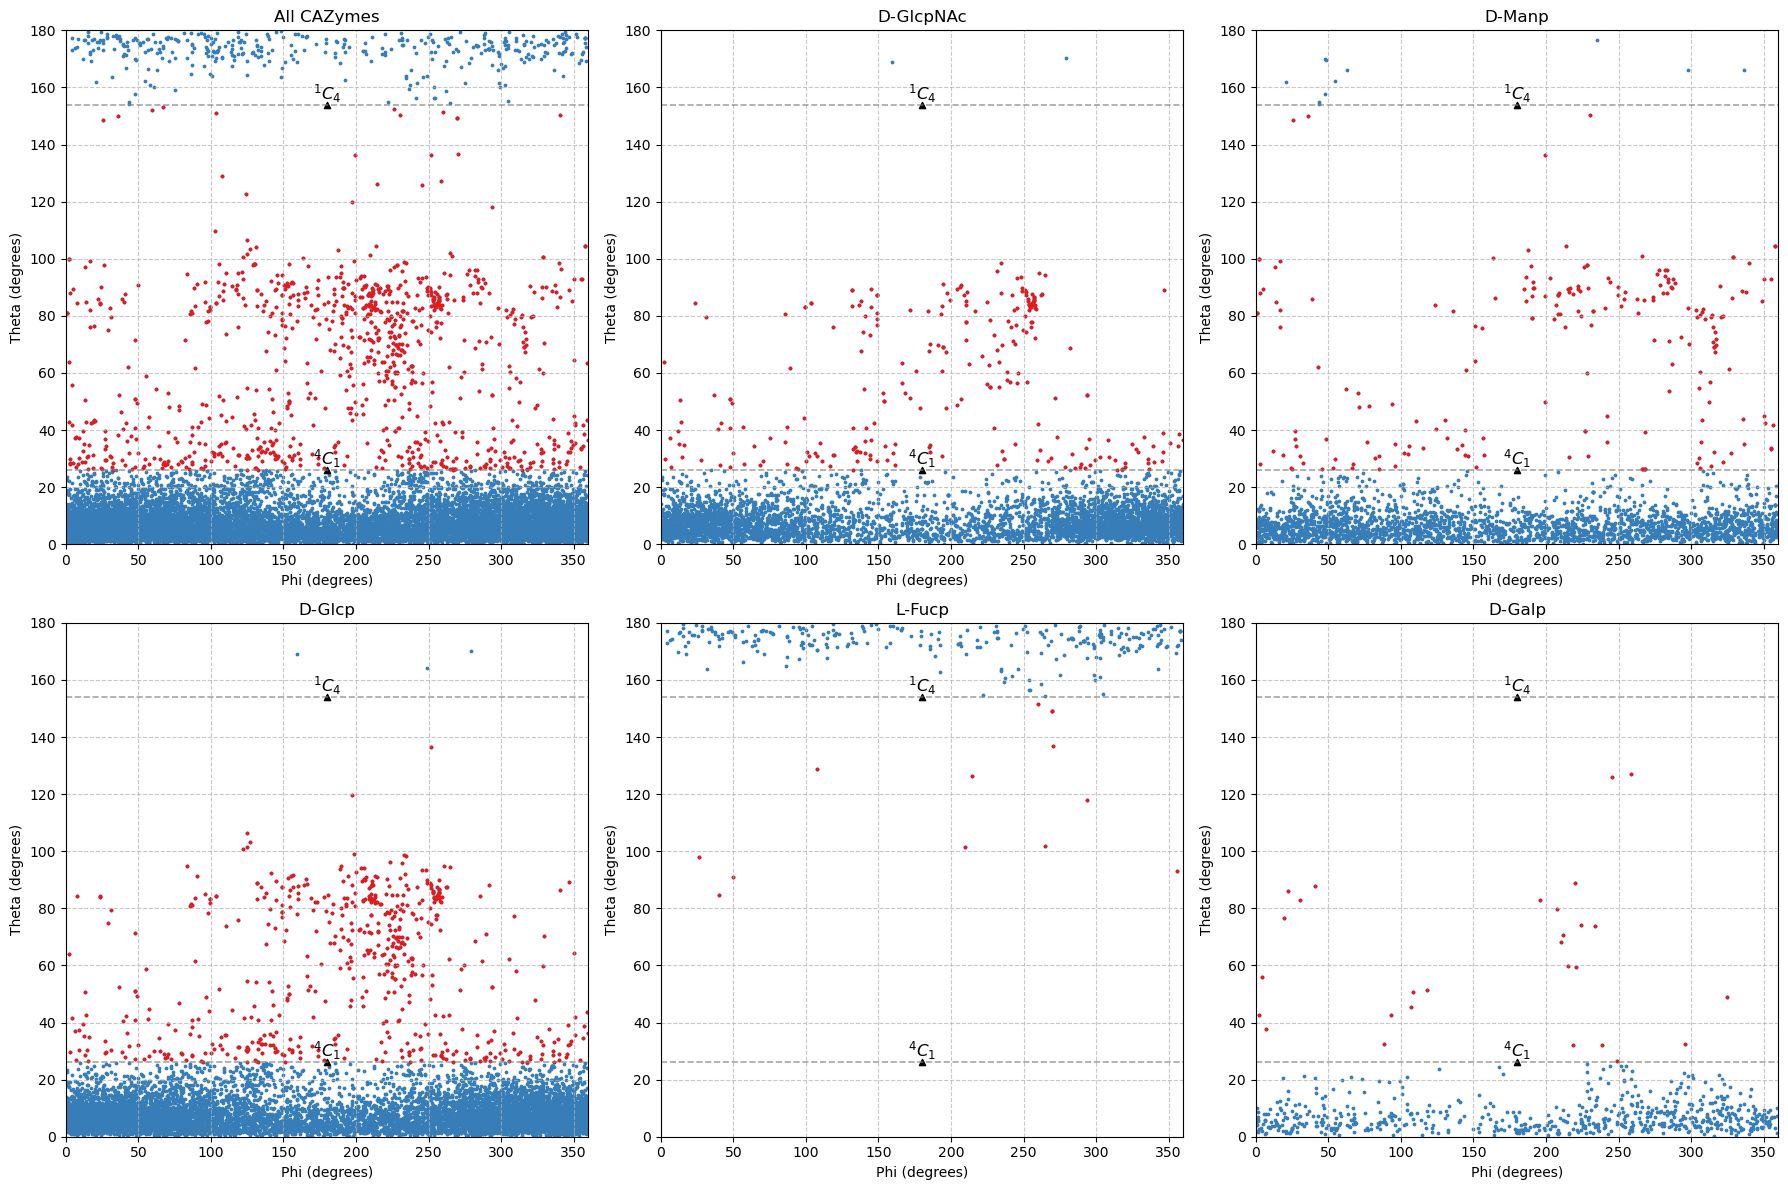

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Lista de açúcares (nomes IUPAC) que você quer analisar
iupac_sugars = ['D-GlcpNAc', 'D-Manp', 'D-Glcp', 'L-Fucp', 'D-Galp']

# Criar uma figura com subplots (2 linhas, 3 colunas)
fig, axs = plt.subplots(2, 3, figsize=(18, 12))  # 2 linhas e 3 colunas
axs = axs.flatten()  # Facilita o acesso aos eixos

# Cor única para todos os pontos
point_color = '#377eb8'  # Azul
highlight_color = '#e41a1c'  # Vermelho para Non-Chair

# Coordenadas e labels para marcar no gráfico
coordinates = [
    (180, 26, r"$^{4}C_{1}$"),
    (180, 154, r"$^{1}C_{4}$")
]

# Plotar todos os pontos do DataFrame no primeiro gráfico (sem filtro)
axs[0].scatter(
    df['puck.phi_graus'], 
    df['puck.theta_graus'], 
    color=point_color, 
    s=3  # Tamanho dos pontos
)

# Destacar pontos vermelhos entre as linhas tracejadas (Non-Chair)
highlight_condition = (df['puck.theta_graus'] > 26) & (df['puck.theta_graus'] < 154)
axs[0].scatter(
    df.loc[highlight_condition, 'puck.phi_graus'], 
    df.loc[highlight_condition, 'puck.theta_graus'], 
    color=highlight_color, 
    s=3,  # Tamanho dos pontos
    label='Non-Chair'
)

# Adicionar as linhas de coordenadas com rótulos
for x, y, label in coordinates:
    axs[0].axhline(y=y, color='gray', linestyle='--', linewidth=1.2, alpha=0.7)
    axs[0].scatter(x, y, color='black', s=20, marker='^')
    axs[0].text(x, y, label, fontsize=12, ha='center', va='bottom', color='black')

# Configuração do primeiro gráfico (All CAZymes)
axs[0].set_xlim([0, 360])
axs[0].set_ylim([0, 180])
axs[0].set_xlabel('Phi (degrees)')
axs[0].set_ylabel('Theta (degrees)')
axs[0].set_title('All CAZymes')
axs[0].grid(True, linestyle='--', alpha=0.7)

# Loop através dos nomes IUPAC e plotar em cada subplot restante
for i, sugar in enumerate(iupac_sugars):
    # Filtrar o DataFrame usando `iupac_name` para o açúcar atual
    mon_df = df[df['iupac_name'].str.contains(sugar, na=False)]
    
    # Scatter plot com cor única
    axs[i+1].scatter(
        mon_df['puck.phi_graus'], 
        mon_df['puck.theta_graus'], 
        color=point_color, 
        s=3  # Tamanho dos pontos
    )
    
    # Destacar pontos vermelhos entre as linhas tracejadas (Non-Chair)
    highlight_condition = (mon_df['puck.theta_graus'] > 26) & (mon_df['puck.theta_graus'] < 154)
    axs[i+1].scatter(
        mon_df.loc[highlight_condition, 'puck.phi_graus'], 
        mon_df.loc[highlight_condition, 'puck.theta_graus'], 
        color=highlight_color, 
        s=3,  # Tamanho dos pontos
        label='Non-Chair'
    )
    
    # Adicionar as linhas de coordenadas com rótulos
    for x, y, label in coordinates:
        axs[i+1].axhline(y=y, color='gray', linestyle='--', linewidth=1.2, alpha=0.7)
        axs[i+1].scatter(x, y, color='black', s=20, marker='^')
        axs[i+1].text(x, y, label, fontsize=12, ha='center', va='bottom', color='black')

    # Configurar os eixos
    axs[i+1].set_xlim([0, 360])
    axs[i+1].set_ylim([0, 180])
    axs[i+1].set_xlabel('Phi (degrees)')
    axs[i+1].set_ylabel('Theta (degrees)')
    
    # Adicionar o título para cada gráfico
    axs[i+1].set_title(f'{sugar}')
    axs[i+1].grid(True, linestyle='--', alpha=0.7)

# Ajustar o layout
plt.tight_layout()
plt.show()


In [ ]:
#Plot por família

import pandas as pd
import matplotlib.pyplot as plt

# Lista de famílias presentes no DataFrame (assume-se que são 6 famílias)
families = df['Family'].unique()

# Criar uma figura com subplots (2 linhas e 3 colunas, já que são 6 famílias)

fig, axs = plt.subplots(2, 3, figsize=(12, 8))  # Ajuste os valores conforme necessário

axs = axs.flatten()  # Facilita o acesso aos eixos

# Loop através das famílias para criar cada subplot
for i, family in enumerate(families):
    fam_df = df[df['Family'] == family]  # Filtrar para a família atual
    
    # Armazenar handles de legenda
    legend_handles = []
    labels = set()  # Para evitar duplicar rótulos na legenda

    # Plotar todos os açúcares na família atual
    for sugar in fam_df['sugar'].unique():
        subset = fam_df[fam_df['sugar'].str.contains(sugar, na=False)]
        scatter = axs[i].scatter(
            subset['puck.phi_graus'], 
            subset['puck.theta_graus'], 
            color=color_dict.get(sugar, '#000000'),  # Padrão para cores ausentes
            s=3,  # Tamanho dos pontos
            label=sugar if sugar not in labels else ""  # Evitar rótulos duplicados
        )
        labels.add(sugar)  # Adicionar o rótulo para controle
        legend_handles.append(scatter)  # Adicionar o artista à lista de handles

    # Configurar os eixos
    axs[i].set_xlim([0, 360])
    axs[i].set_ylim([0, 180])
    axs[i].set_xlabel('Phi (degrees)')
    axs[i].set_ylabel('Theta (degrees)')
    
    # Adicionar o título para cada gráfico
    axs[i].set_title(f'{family}: Sugar Distribution')
    axs[i].grid(True)  # Adicionar grade para melhor visualização

    # Adicionar a legenda
    axs[i].legend(title='Sugar', loc='center left', bbox_to_anchor=(1, 0.5), handletextpad=0.5)

# Ajustar o layout
plt.tight_layout()
plt.show()


In [13]:
family_names = {
    'AA': 'Auxiliary Activities',
    'GH': 'Glycoside Hydrolases',
    'CBM': 'Carbohydrate-Binding Modules',
    'GT': 'Glycosyltransferases',
    'CE': 'Carbohydrate Esterases',
    'PL': 'Polysaccharide Lyases'
}

df['Family'] = df['Family'].replace(family_names)

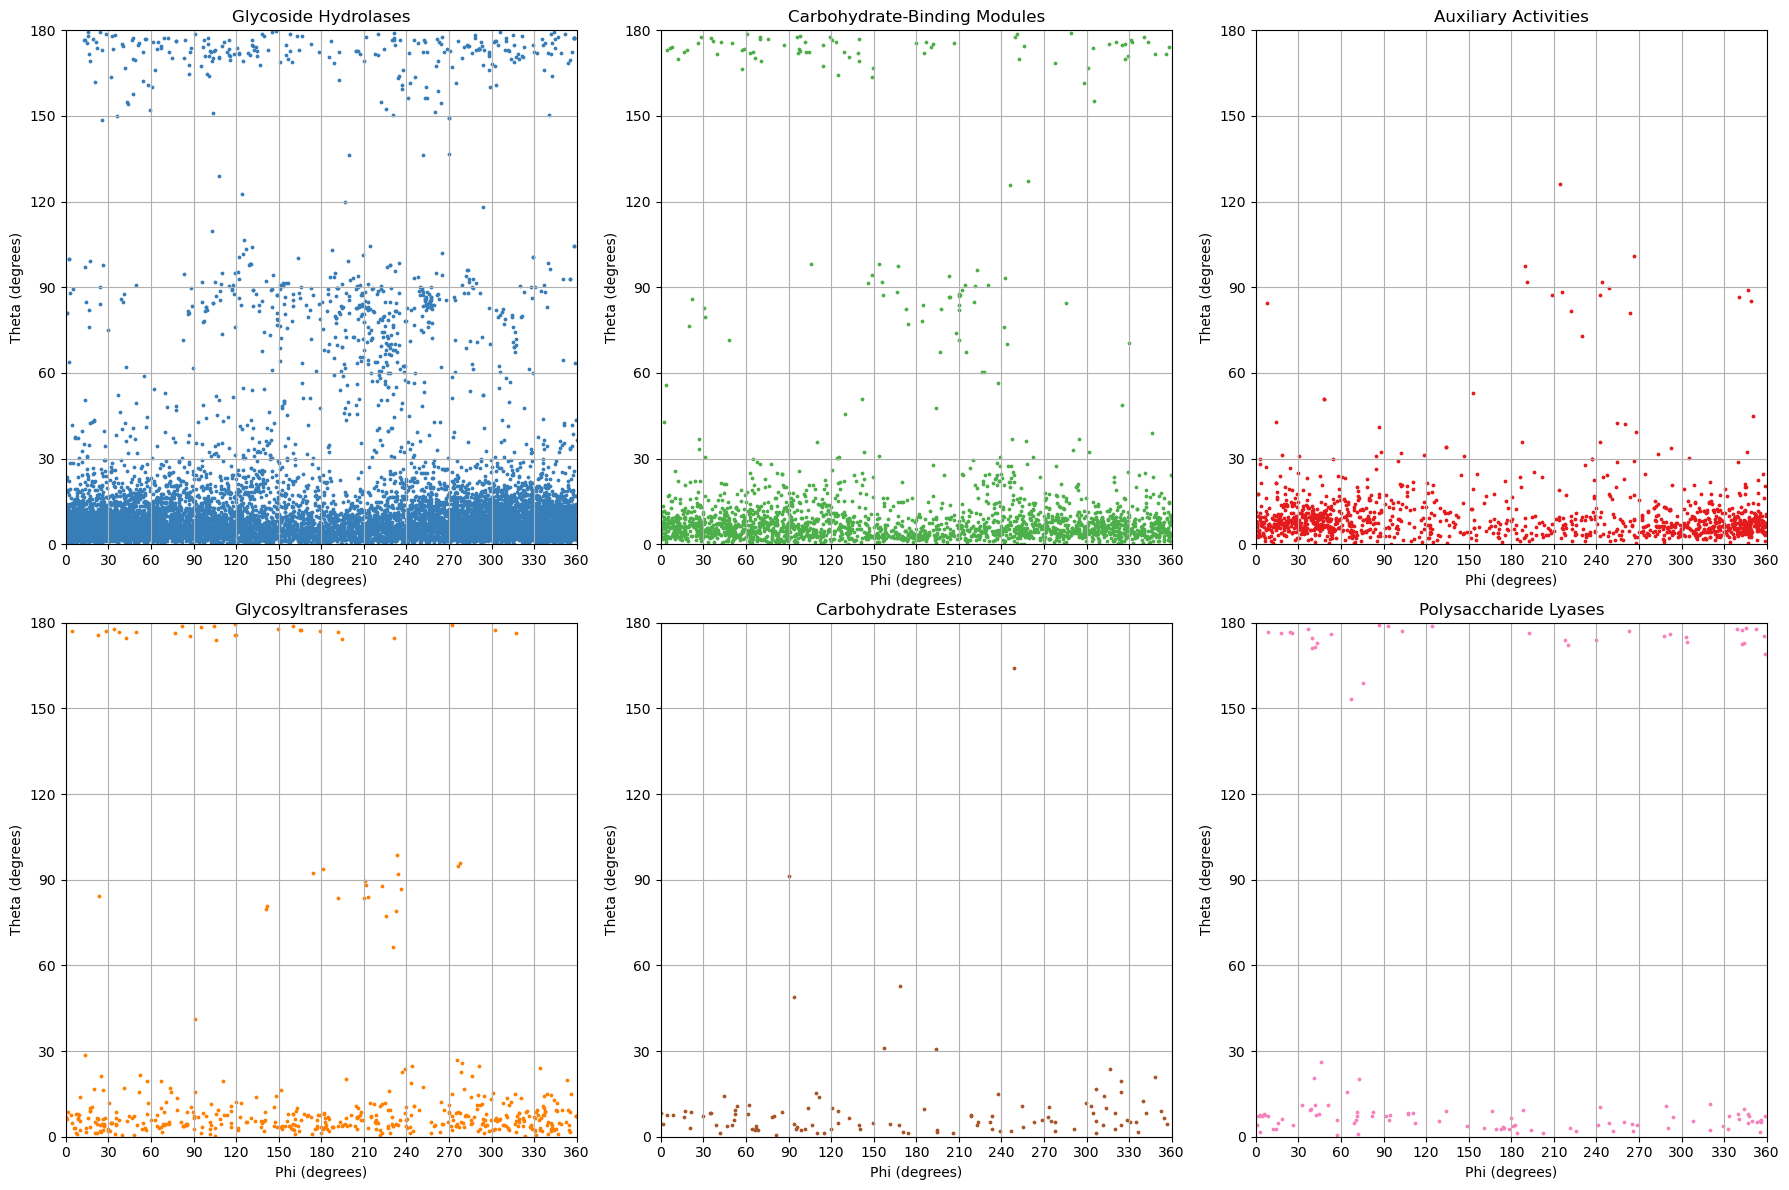

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Criar uma lista com as famílias únicas
families = df['Family'].unique()

# Criar uma figura com subplots (3 linhas e 2 colunas)
fig, axs = plt.subplots(2, 3, figsize=(18, 12))  # 3 linhas e 2 colunas
axs = axs.flatten()  # Facilita o acesso aos eixos

# Definir uma cor padrão para todos os pontos de cada família (se necessário)
color_dict = {
    'Auxiliary Activities': '#e41a1c',
    'Glycoside Hydrolases': '#377eb8',
    'Carbohydrate-Binding Modules': '#4daf4a',
    'Glycosyltransferases': '#ff7f00',
    'Carbohydrate Esterases': '#a65628',
    'Polysaccharide Lyases': '#f781bf'
}

# Loop através das famílias para criar cada subplot
for i, family in enumerate(families):
    fam_df = df[df['Family'] == family]  # Filtrar para a família atual
    
    # Plotar os pontos para a família atual com uma cor fixa
    axs[i].scatter(
        fam_df['puck.phi_graus'], 
        fam_df['puck.theta_graus'], 
        color=color_dict.get(family, '#000000'),  # Cor da família
        s=3  # Tamanho dos pontos
    )

    # Configurações do gráfico
    axs[i].set_xlim([0, 360])  # Limites do eixo x
    axs[i].set_ylim([0, 180])  # Limites do eixo y
    axs[i].set_xlabel('Phi (degrees)')  # Rótulo do eixo x
    axs[i].set_ylabel('Theta (degrees)')  # Rótulo do eixo y
    axs[i].set_title(f'{family}')  # Título do gráfico
    axs[i].grid(True)  # Adicionar grade para melhor visualização

    # Definir os valores dos eixos com intervalo de 30
    axs[i].set_xticks(range(0, 361, 30))  # Eixo x de 0 a 360 com intervalo de 30
    axs[i].set_yticks(range(0, 181, 30))  # Eixo y de 0 a 180 com intervalo de 30

# Ajustar o layout para evitar sobreposição
plt.tight_layout()
plt.show()


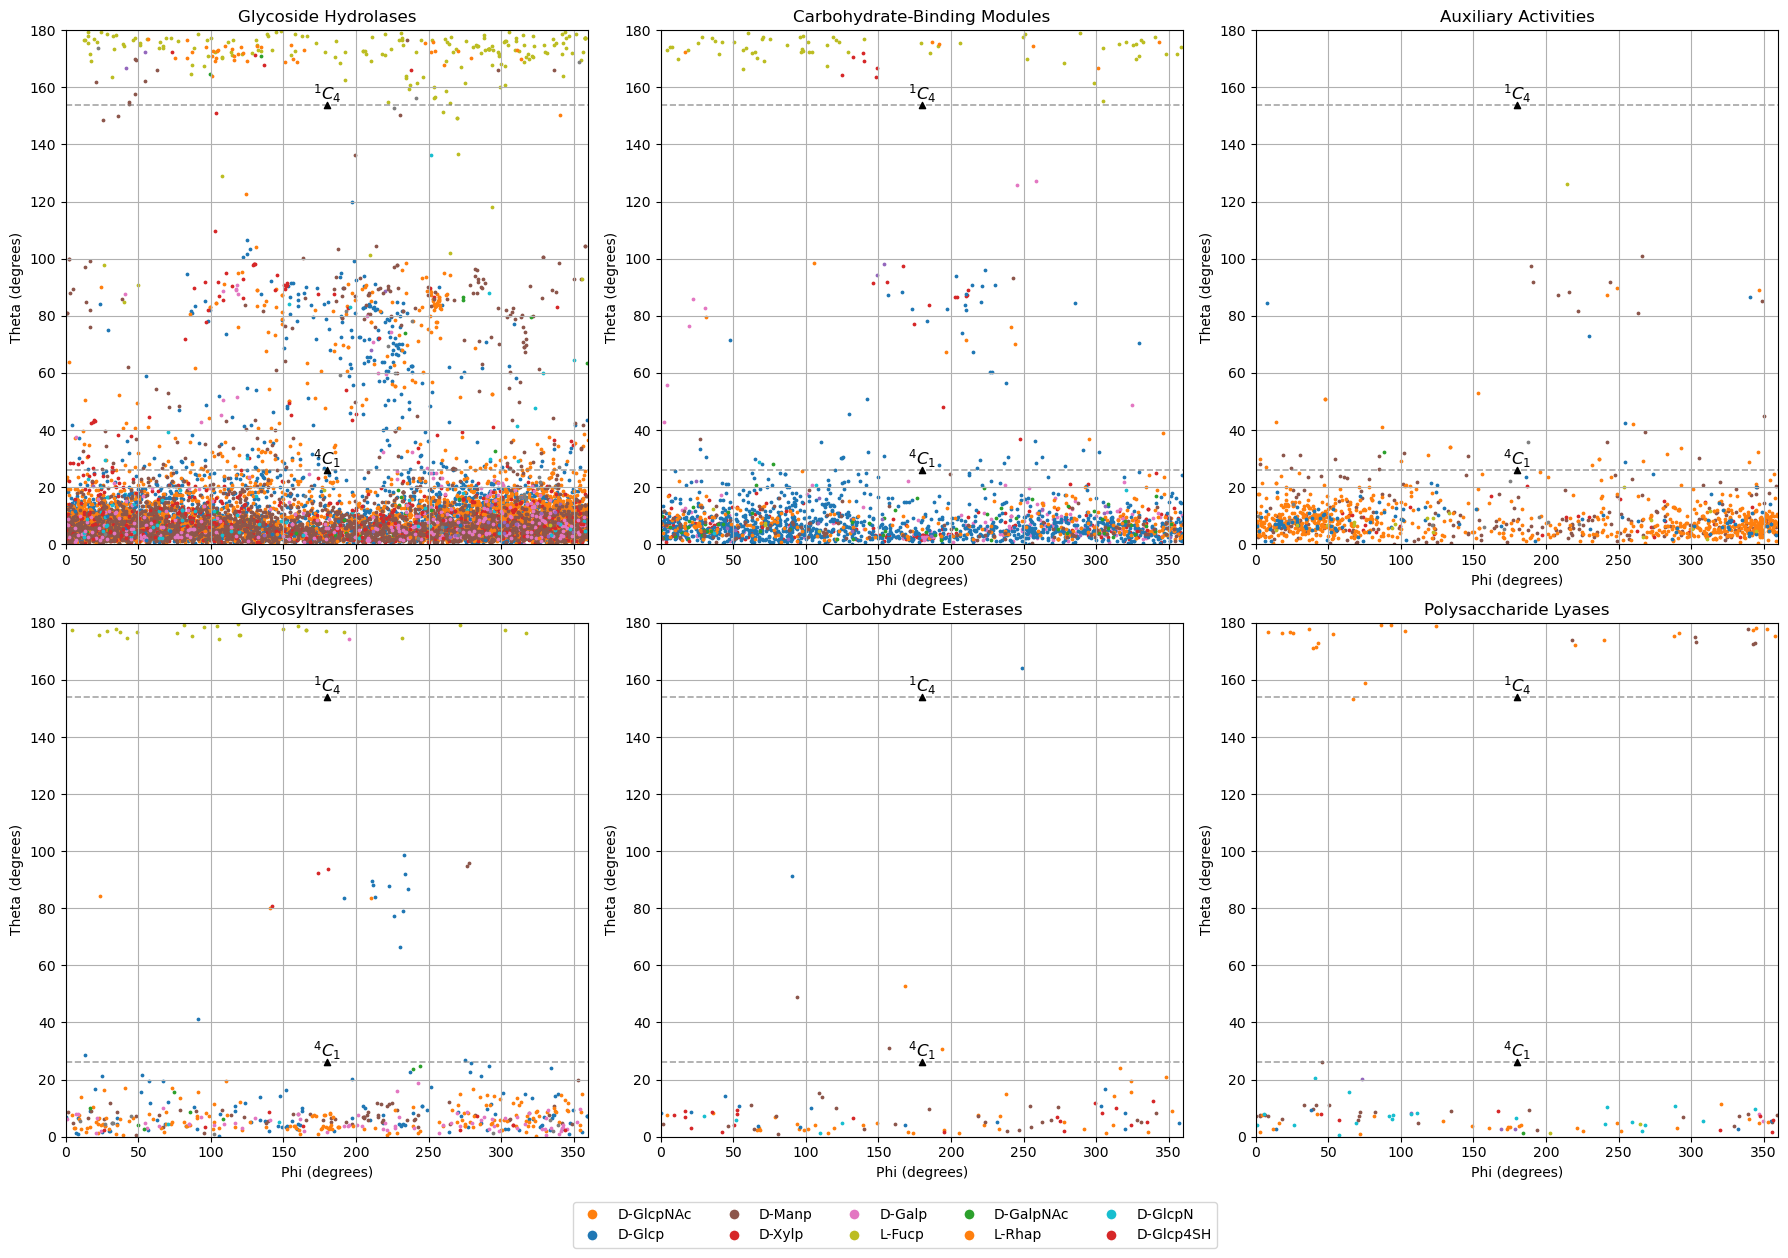

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# #Read df 
# df = pd.read_csv('/home/douglas/carboanalysis/carboanalysis/pdb/dataframes/puckering/piranoses_clean_family_and_protein_name_entry_name.csv')
# df = df.iloc[:, 4:]
# # Remover todos os números da coluna
# df['Family'] = df['Family'].str.replace('\d+', '', regex=True)

# # Separar a sigla dos açúcares
# df['comp_id'] = df['sugar'].str.split('_').str[1]

# # Merge com iupac_names
# iupac_names_df = pd.read_csv('/home/douglas/carboanalysis/carboanalysis/pdb/dataframes/iupac_names.txt', sep=';', header=None, names=['comp_id', 'iupac_name'])
# df = pd.merge(df, iupac_names_df, on='comp_id', how='left')

# #Junta alfa e beta
# df['iupac_name'] = df['iupac_name'].str.replace(r'^(a-|b-)', '', regex=True)

# Criar um dicionário de cores para os tipos de açúcar
color_dict = {
    sugar: plt.cm.tab10(i % 10) for i, sugar in enumerate(df['iupac_name'].unique())
}

# Labels
coordinates = [
    (180, 26, r"$^{4}C_{1}$"),
    (180, 154, r"$^{1}C_{4}$")
]

# Criar uma figura com subplots (2 linhas e 3 colunas)
fig, axs = plt.subplots(2, 3, figsize=(18, 12))  # 2 linhas e 3 colunas
axs = axs.flatten()  # Facilita o acesso aos eixos

# Loop através dos subplots (uma família por gráfico)
for i, family in enumerate(df['Family'].unique()):
    fam_df = df[df['Family'] == family]  # Filtrar os dados para a família atual
    
    # Plotar os pontos para cada tipo de açúcar
    for sugar in fam_df['iupac_name'].unique():
        sugar_df = fam_df[fam_df['iupac_name'] == sugar]  # Filtrar por tipo de açúcar
        axs[i].scatter(
            sugar_df['puck.phi_graus'], 
            sugar_df['puck.theta_graus'], 
            color=color_dict[sugar],  # Cor correspondente ao tipo de açúcar
            s=3  # Tamanho dos pontos
        )

    # Adicionar as coordenadas específicas com rótulos
    for x, y, label in coordinates:
        axs[i].axhline(y=y, color='gray', linestyle='--', linewidth=1.2, alpha=0.7, zorder=1)
        axs[i].scatter(x, y, color='black', s=20, marker='^', zorder=10)
        axs[i].text(
            x, y, label,
            fontsize=12, ha='center', va='bottom', color='black', zorder=10
        )

    # Configurações do gráfico
    axs[i].set_xlim([0, 360])
    axs[i].set_ylim([0, 180])
    axs[i].set_xlabel('Phi (degrees)')
    axs[i].set_ylabel('Theta (degrees)')
    axs[i].set_title(f'{family}')
    axs[i].grid(True)

# Calcular os Top 10 IDs mais frequentes na coluna iupac_name
top_10_ids = df['iupac_name'].value_counts().nlargest(10).index.tolist()

# Criar handles para a legenda global
legend_handles = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_dict[sugar], markersize=8, label=sugar)
    for sugar in top_10_ids
]

# Adicionar uma legenda global na parte inferior da figura
fig.legend(
    handles=legend_handles,
    loc='lower center',
    fontsize=10,
    ncol=5,  # Quantidade de colunas na legenda
    frameon=True,
    bbox_to_anchor=(0.5, -0.05)  # Ajustar a posição da legenda
)

# Ajustar o layout para evitar sobreposição
plt.tight_layout()
plt.show()


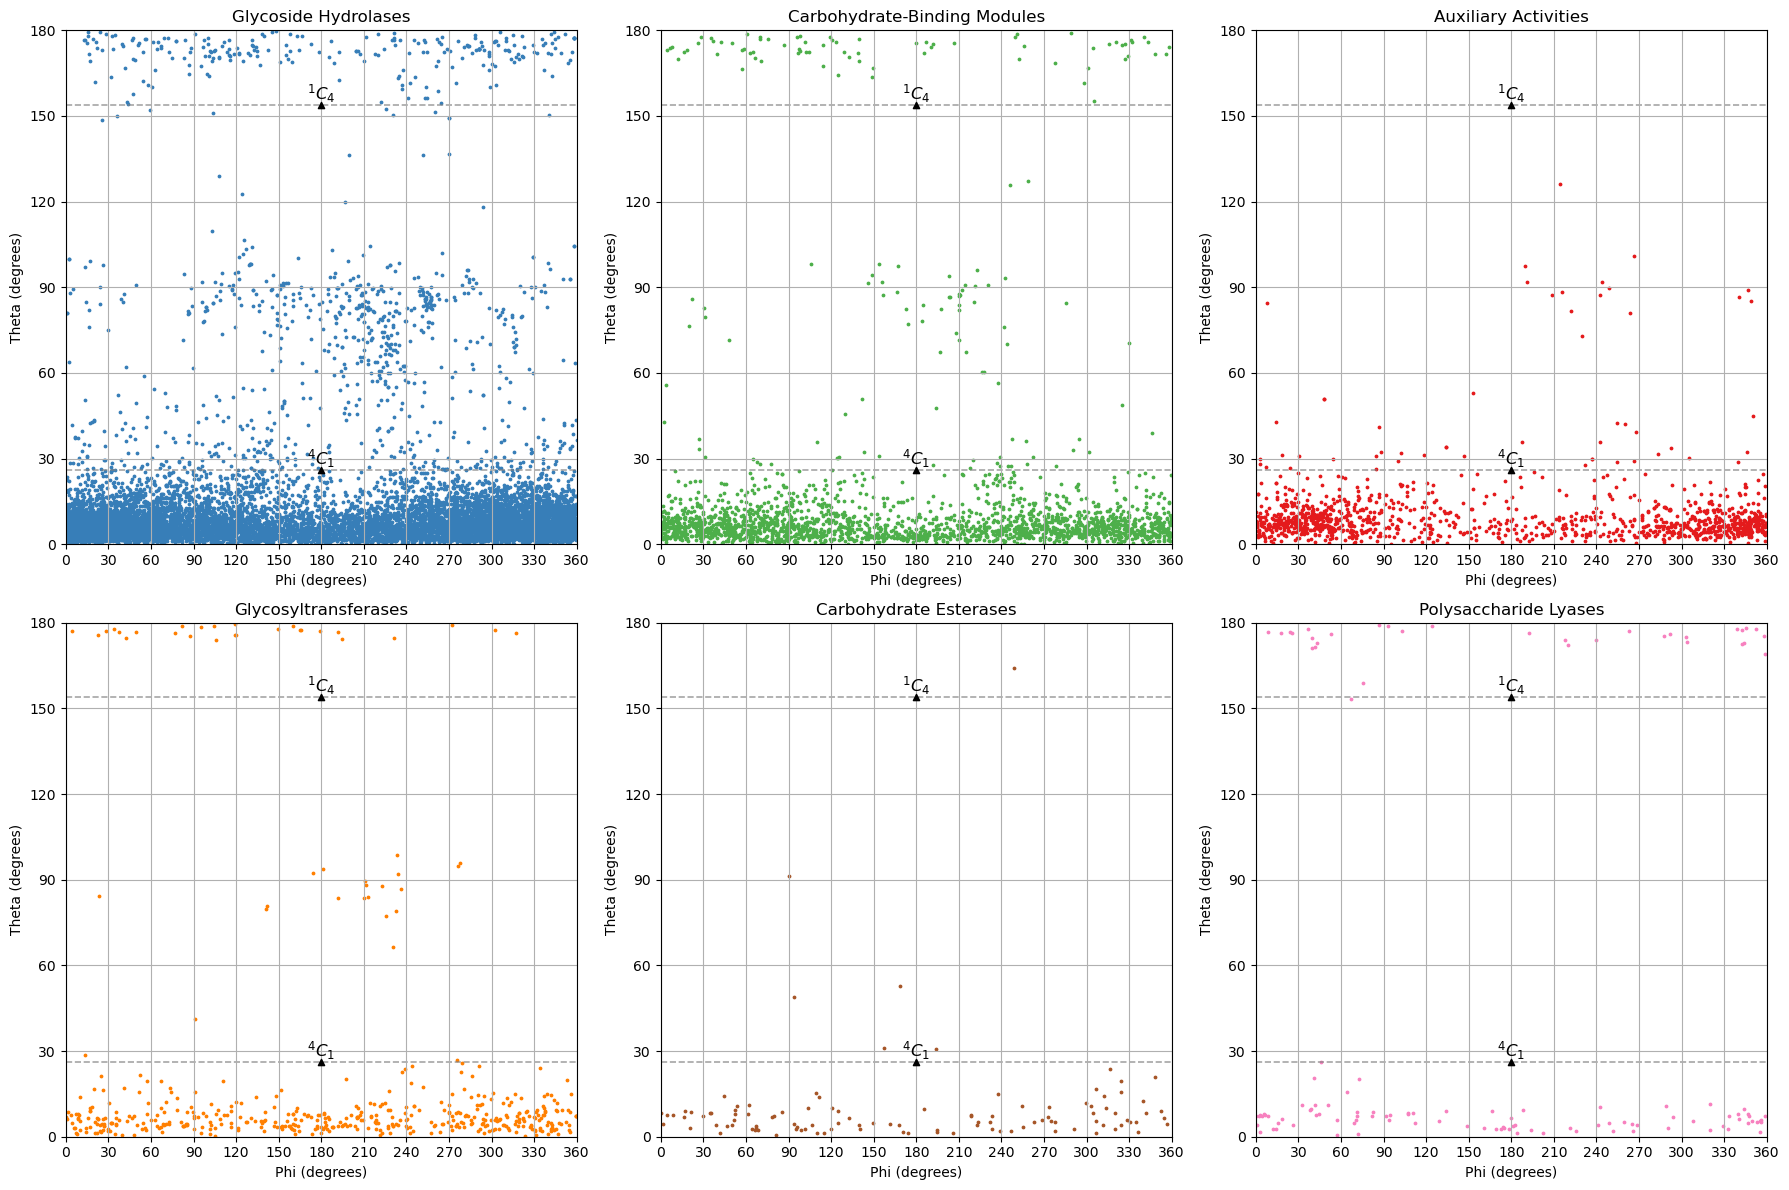

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# formatação TeX
# coordinates = [
#     (180, 26, r"$^{4}C_{1}$"),
#     (180, 154, r"$^{1}C_{4}$"),
#     (30, 50.8, r"$^{OH}_{1}$"),
#     (60, 54.7, r"$E_{1}$"),
#     (90, 50.8, r"$^{2}H_{1}$"),
#     (120, 54.7, r"$^{2}E$"),
#     (150, 50.8, r"$^{2}H_{3}$"),
#     (180, 54.7, r"$E_{3}$"),
#     (210, 50.8, r"$^{4}H_{3}$"),
#     (240, 54.7, r"$^{4}E$"),
#     (270, 50.8, r"$^{4}H_{5}$"),
#     (300, 54.7, r"$E_{5}$"),
#     (330, 50.8, r"$^{OH}_{5}$"),
#     (360, 54.7, r"$^{OE}$"),
#     (30, 90, r"$^{3}S_{1}$"),
#     (60, 90, r"$B_{1,4}$"),
#     (90, 90, r"$^{5}S_{1}$"),
#     (120, 90, r"$^{2,5}B$"),
#     (150, 90, r"$^{2}S_{O}$"),
#     (180, 90, r"$B_{3,O}$"),
#     (210, 90, r"$^{1}S_{3}$"),
#     (240, 90, r"$^{1,4}B$"),
#     (270, 90, r"$^{1}S_{5}$"),
#     (300, 90, r"$B_{2,5}$"),
#     (330, 90, r"$^{OS}_{2}$"),
#     (360, 90, r"$^{3,OB}$"),
#     (30, 129.2, r"$^{3}H_{4}$"),
#     (60, 125.3, r"$E_{4}$"),
#     (90, 129.2, r"$^{5}H_{4}$"),
#     (120, 125.3, r"$^{5}E$"),
#     (150, 129.2, r"$^{5}H_{O}$"),
#     (180, 125.3, r"$E_{O}$"),
#     (210, 129.2, r"$^{1}H_{O}$"),
#     (240, 125.3, r"$^{1}E$"),
#     (270, 129.2, r"$^{1}H_{2}$"),
#     (300, 125.3, r"$E_{2}$"),
#     (330, 129.2, r"$^{3}H_{2}$"),
#     (360, 125.3, r"$^{3}E$")
# ]


coordinates = [
    (180, 26, r"$^{4}C_{1}$"),
    (180, 154, r"$^{1}C_{4}$")]

# Criar uma lista com as famílias únicas
families = df['Family'].unique()

# Criar uma figura com subplots (3 linhas e 2 colunas)
fig, axs = plt.subplots(2, 3, figsize=(18, 12))  # 3 linhas e 2 colunas
axs = axs.flatten()  # Facilita o acesso aos eixos

# Definir uma cor padrão para todos os pontos de cada família (se necessário)
color_dict = {
    'Auxiliary Activities': '#e41a1c',
    'Glycoside Hydrolases': '#377eb8',
    'Carbohydrate-Binding Modules': '#4daf4a',
    'Glycosyltransferases': '#ff7f00',
    'Carbohydrate Esterases': '#a65628',
    'Polysaccharide Lyases': '#f781bf'
}

# Loop através das famílias para criar cada subplot
for i, family in enumerate(families):
    fam_df = df[df['Family'] == family]  # Filtrar para a família atual
    
    # Plotar os pontos para a família atual com uma cor fixa
    axs[i].scatter(
        fam_df['puck.phi_graus'], 
        fam_df['puck.theta_graus'], 
        color=color_dict.get(family, '#000000'),  # Cor da família
        s=3  # Tamanho dos pontos
    )

    # Adicionar as coordenadas específicas com rótulos
    for x, y, label in coordinates:  # Note que agora x e y estão corretamente ordenados
        
        axs[i].axhline(
            y=y, 
            color='gray', 
            linestyle='--', 
            linewidth=1.2, 
            alpha=0.7, 
            zorder=1
        )  # Linha horizontal
        
        axs[i].scatter(x, y, color='black', s=20, marker='^', zorder=10)  # Ponto marcado
        axs[i].text(
        x, y, 
        label,
        fontsize=12,
        ha='center',  # Alinha o texto horizontalmente ao centro do marcador
        va='bottom',  # Alinha verticalmente com a parte inferior do texto
        color='black',
        zorder=10
        )

    # Configurações do gráfico
    axs[i].set_xlim([0, 360])  # Limites do eixo x
    axs[i].set_ylim([0, 180])  # Limites do eixo y
    axs[i].set_xlabel('Phi (degrees)')  # Rótulo do eixo x
    axs[i].set_ylabel('Theta (degrees)')  # Rótulo do eixo y
    axs[i].set_title(f'{family}')  # Título do gráfico
    axs[i].grid(True)  # Adicionar grade para melhor visualização

    # Definir os valores dos eixos com intervalo de 30
    axs[i].set_xticks(range(0, 361, 30))  # Eixo x de 0 a 360 com intervalo de 30
    axs[i].set_yticks(range(0, 181, 30))  # Eixo y de 0 a 180 com intervalo de 30

# Ajustar o layout para evitar sobreposição
plt.tight_layout()
plt.show()


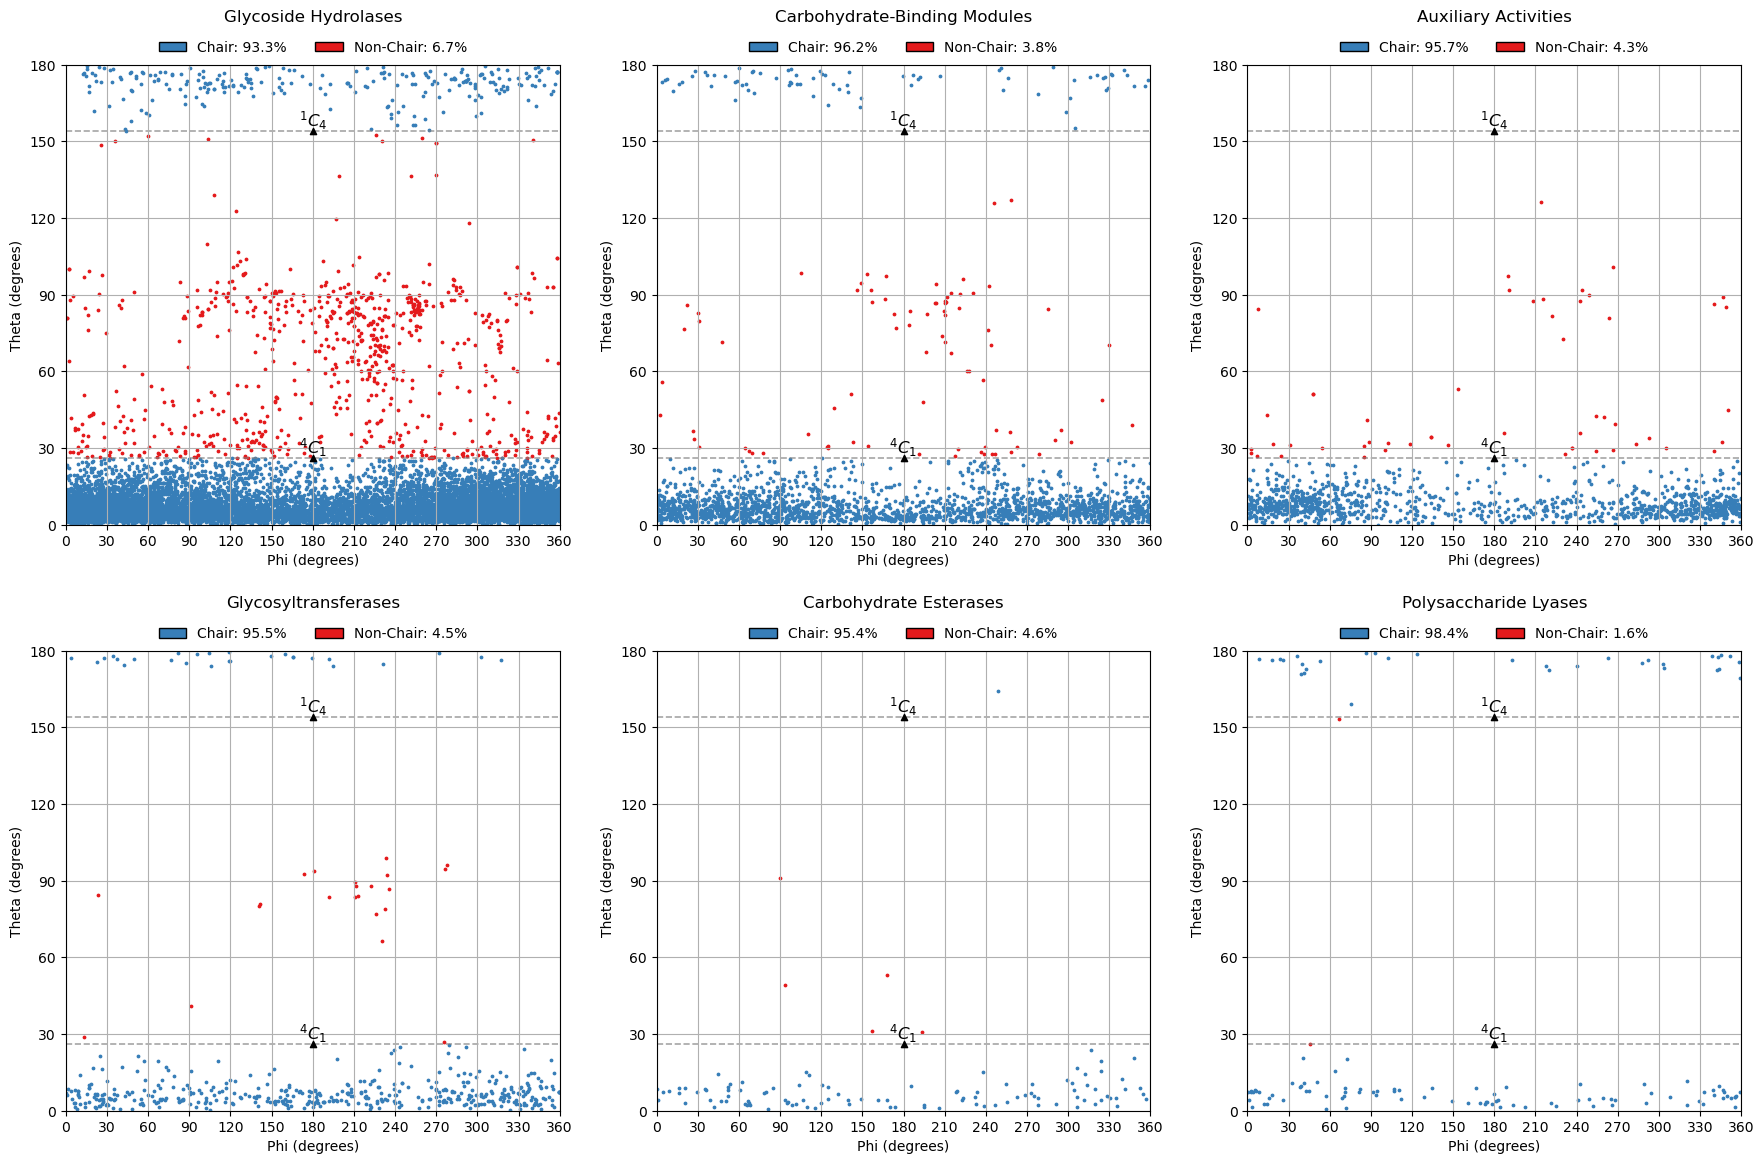

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Coordenadas e labels
coordinates = [
    (180, 26, r"$^{4}C_{1}$"),
    (180, 154, r"$^{1}C_{4}$")
]

# Criar uma figura com subplots (2 linhas e 3 colunas)
fig, axs = plt.subplots(2, 3, figsize=(18, 12))  # 2 linhas e 3 colunas
axs = axs.flatten()  # Facilita o acesso aos eixos

# Azul padrão para os pontos
default_color = '#377eb8'  # Azul (Chair)
highlight_color = '#e41a1c'  # Vermelho (Non-Chair)

# Loop através das famílias para criar cada subplot
for i, family in enumerate(families):
    fam_df = df[df['Family'] == family]  # Filtrar os dados para a família atual
    
    # Identificar os pontos que precisam de destaque (y entre 26 e 154)
    highlight_condition = (fam_df['puck.theta_graus'] > 26) & (fam_df['puck.theta_graus'] < 154)
    
    # Pontos destacados (Non-Chair)
    axs[i].scatter(
        fam_df.loc[highlight_condition, 'puck.phi_graus'], 
        fam_df.loc[highlight_condition, 'puck.theta_graus'], 
        color=highlight_color,  # Vermelho
        s=3,  # Tamanho dos pontos
        label='Non-Chair'
    )
    
    # Pontos padrão (Chair)
    axs[i].scatter(
        fam_df.loc[~highlight_condition, 'puck.phi_graus'], 
        fam_df.loc[~highlight_condition, 'puck.theta_graus'], 
        color=default_color,  # Azul
        s=3,  # Tamanho dos pontos
        label='Chair'
    )

    # Cálculo das porcentagens
    total_points = len(fam_df)
    chair_points = len(fam_df.loc[~highlight_condition])
    non_chair_points = len(fam_df.loc[highlight_condition])
    
    chair_percentage = (chair_points / total_points) * 100
    non_chair_percentage = (non_chair_points / total_points) * 100

    # Adicionar as coordenadas específicas com rótulos
    for x, y, label in coordinates:
        axs[i].axhline(
            y=y, 
            color='gray', 
            linestyle='--', 
            linewidth=1.2, 
            alpha=0.7, 
            zorder=1
        )  # Linha horizontal
        axs[i].scatter(x, y, color='black', s=20, marker='^', zorder=10)  # Ponto marcado
        axs[i].text(
            x, y, 
            label,
            fontsize=12,
            ha='center',
            va='bottom',
            color='black',
            zorder=10
        )

    # Configurações do gráfico
    axs[i].set_xlim([0, 360])  # Limites do eixo x
    axs[i].set_ylim([0, 180])  # Limites do eixo y
    axs[i].set_xlabel('Phi (degrees)')  # Rótulo do eixo x
    axs[i].set_ylabel('Theta (degrees)')  # Rótulo do eixo y

    # Escrever o título com as porcentagens
    axs[i].set_title(
        f'{family}\n\n',
        fontsize=12
    )

    axs[i].grid(True)  # Adicionar grade para melhor visualização

    # Definir os valores dos eixos com intervalo de 30
    axs[i].set_xticks(range(0, 361, 30))  # Eixo x de 0 a 360 com intervalo de 30
    axs[i].set_yticks(range(0, 181, 30))  # Eixo y de 0 a 180 com intervalo de 30

    # Adicionar a legenda dentro do gráfico, entre o título e o gráfico
    legend_elements = [
        Patch(facecolor=default_color, edgecolor='black', label=f'Chair: {chair_percentage:.1f}%'),
        Patch(facecolor=highlight_color, edgecolor='black', label=f'Non-Chair: {non_chair_percentage:.1f}%')
    ]
    axs[i].legend(
        handles=legend_elements,
        loc='upper center',  # Posiciona no topo central
        bbox_to_anchor=(0.5, 1.08),  # Coloca entre o título e o gráfico (ajustado para 1.05)
        fontsize=10,
        frameon=False,  # Remover a caixa de borda
        ncol=2  # Organiza a legenda em duas colunas
    )

# Ajustar o layout para evitar sobreposição
plt.subplots_adjust(hspace=0.3)  # Ajuste o espaçamento entre os subgráficos (hspace controla a altura)
plt.tight_layout(pad=2.0)  # Ajuste de padding para evitar sobreposição
plt.show()


In [42]:
#Chair and non-chair

#BMA or MAN

filtered_df = df[df['sugar'].str.contains('BMA|MAN', na=False)]

#Chair
chair_df = filtered_df[(filtered_df['puck.theta_graus'].between(160, 180)) | (filtered_df['puck.theta_graus'].between(0, 20))]

stats = chair_df['puck.theta_graus'].describe()
print(stats)

# non-Chair

non_chair_df = filtered_df[~filtered_df.isin(chair_df)].dropna()

stats = non_chair_df['puck.theta_graus'].describe()
print(stats)


count    2629.000000
mean        6.840379
std         9.744490
min         0.029794
25%         3.278522
50%         5.611892
75%         8.635734
max       176.443212
Name: puck.theta_graus, dtype: float64
count    268.000000
mean      58.266373
std       32.769152
min       20.102797
25%       26.498281
50%       53.397890
75%       86.993271
max      157.774987
Name: puck.theta_graus, dtype: float64


In [10]:
#Chair and non-chair

#GLC or BGC

filtered_df = df[df['sugar'].str.contains('GLC|BGC', na=False)]

#Chair
chair_df = filtered_df[(filtered_df['puck.theta_graus'].between(160, 180)) | (filtered_df['puck.theta_graus'].between(0, 20))]

stats = chair_df['puck.theta_graus'].describe()
print(stats)

# non-Chair

non_chair_df = filtered_df[~filtered_df.isin(chair_df)].dropna()

stats = non_chair_df['puck.theta_graus'].describe()
print(stats)


count    4397.000000
mean        7.355834
std         4.960185
min         0.110122
25%         3.990307
50%         6.473163
75%         9.955543
max       164.081705
Name: puck.theta_graus, dtype: float64
count    456.000000
mean      46.903647
std       26.062462
min       20.078561
25%       23.669202
50%       33.152083
75%       72.222963
max      119.727896
Name: puck.theta_graus, dtype: float64


In [11]:
#Chair and non-chair

#GAL or GLA

filtered_df = df[df['sugar'].str.contains('GAL|GLA', na=False)]

#Chair
chair_df = filtered_df[(filtered_df['puck.theta_graus'].between(160, 180)) | (filtered_df['puck.theta_graus'].between(0, 20))]

stats = chair_df['puck.theta_graus'].describe()
print(stats)

# non-Chair

non_chair_df = filtered_df[~filtered_df.isin(chair_df)].dropna()

stats = non_chair_df['puck.theta_graus'].describe()
print(stats)


count    474.000000
mean       6.553271
std        4.200722
min        0.201051
25%        3.267793
50%        5.683025
75%        8.756457
max       19.847831
Name: puck.theta_graus, dtype: float64
count     41.000000
mean      44.445598
std       28.765799
min       20.218363
25%       22.345870
50%       32.172669
75%       59.445918
max      127.225049
Name: puck.theta_graus, dtype: float64


In [12]:
#Chair and non-chair

#FUC or FUL

filtered_df = df[df['sugar'].str.contains('FUC|FUL', na=False)]

#Chair
chair_df = filtered_df[(filtered_df['puck.theta_graus'].between(160, 180)) | (filtered_df['puck.theta_graus'].between(0, 20))]

stats = chair_df['puck.theta_graus'].describe()
print(stats)

# non-Chair

non_chair_df = filtered_df[~filtered_df.isin(chair_df)].dropna()

stats = non_chair_df['puck.theta_graus'].describe()
print(stats)


count    255.000000
mean     174.095873
std        3.982739
min      160.022586
25%      172.254404
50%      174.859443
75%      177.070744
max      179.671715
Name: puck.theta_graus, dtype: float64
count     21.000000
mean     132.606754
std       27.092300
min       84.729285
25%      101.915040
50%      149.283752
75%      155.092972
max      159.996402
Name: puck.theta_graus, dtype: float64


In [28]:
#ALL

#Chair
chair_df = df[(df['puck.theta_graus'].between(154, 180)) | (df['puck.theta_graus'].between(0, 26))]
#chair_df = df[(df['puck.theta_graus'].between(0, 30))]

stats = chair_df['puck.theta_graus'].describe()
print(stats)

# non-Chair

non_chair_df = df[~df.isin(chair_df)].dropna()

stats = non_chair_df['puck.theta_graus'].describe()
print(stats)

count    14627.000000
mean        11.855571
std         26.639730
min          0.029794
25%          3.995091
50%          6.668770
75%         10.412906
max        179.671715
Name: puck.theta_graus, dtype: float64
count    911.000000
mean      63.303822
std       27.022609
min       26.019159
25%       35.453626
50%       67.399260
75%       85.135455
max      153.245355
Name: puck.theta_graus, dtype: float64


In [29]:
#Percentual por família

#Chair

chair_family_count = chair_df['Family'].value_counts()
print(chair_family_count)

#Non-Chair

non_chair_family_count = non_chair_df['Family'].value_counts()
print(non_chair_family_count)

conf_dict = {
    'family': ['Glycoside Hydrolases',
                'Carbohydrate-Binding Modules',
                  'Auxiliary Activities',
                    'Glycosyltransferases',
                      'Polysaccharide Lyases',
                        'Carbohydrate Esterases'],
    'chair': chair_family_count.values,
    'non_chair': non_chair_family_count.values
}
conf_df = pd.DataFrame(conf_dict)

conf_df['total'] = conf_df['chair'] + conf_df['non_chair']

conf_df['chair_percent'] = (conf_df['chair'] / conf_df['total']) * 100

conf_df['non_chair_percent'] = (conf_df['non_chair'] / conf_df['total']) * 100

conf_df['dist_percent'] = (conf_df['non_chair'] / conf_df['non_chair'].sum()) * 100


Glycoside Hydrolases            10710
Carbohydrate-Binding Modules     2063
Auxiliary Activities             1167
Glycosyltransferases              462
Polysaccharide Lyases             121
Carbohydrate Esterases            104
Name: Family, dtype: int64
Glycoside Hydrolases            750
Carbohydrate-Binding Modules     79
Auxiliary Activities             53
Glycosyltransferases             22
Carbohydrate Esterases            5
Polysaccharide Lyases             2
Name: Family, dtype: int64


/tmp/ipykernel_287453/1401622958.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pl['carbo'] = df_pl['sugar'].str.split('_').str[1]


MAN    23
RAM    23
ASG    19
NAG    14
SGN    10
XYP     7
83Y     4
NG6     4
MXY     4
BGC     4
GLA     2
MXZ     2
BMA     2
G4D     2
NGA     1
SUS     1
NGK     1
Name: carbo, dtype: int64


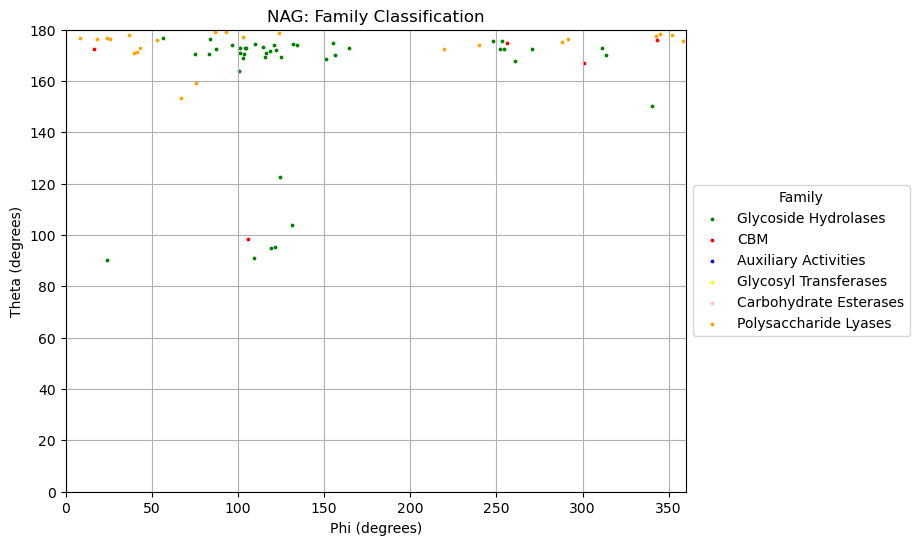

In [7]:
#

df_pl = df[df['Family'] == 'PL']

df_pl['carbo'] = df_pl['sugar'].str.split('_').str[1]

print(df_pl['carbo'].value_counts())


import pandas as pd
import matplotlib.pyplot as plt

#NAG

mon_df = df[df['sugar'].str.contains('RAM', na=False)]

# Criar o gráfico de dispersão
plt.figure(figsize=(8, 6))

# Dicionário para mapear as cores
color_dict = {
    'GH': 'green',
    'CBM': 'red',
    'AA': 'blue',
    'GT': 'yellow',
    'CE': 'pink',
    'PL': 'orange'
}

# Dicionário para mapear abreviações para nomes completos

full_names_dict = {
    'GH': 'Glycoside Hydrolases',
    'CBM': 'CBM',
    'AA': 'Auxiliary Activities',
    'GT': 'Glycosyl Transferases',
    'CE': 'Carbohydrate Esterases',
    'PL': 'Polysaccharide Lyases'
}

# Plotar cada classificação com sua cor correspondente
for family in color_dict.keys():
    subset = mon_df[mon_df['Family'] == family]
    plt.scatter(
        subset['puck.phi_graus'], 
        subset['puck.theta_graus'], 
        color=color_dict[family], 
        label=full_names_dict[family], 
        s=3  # Tamanho dos pontos
    )

# Configurar os eixos
plt.xlim([0, 360])
plt.ylim([0, 180])
plt.xlabel('Phi (degrees)')
plt.ylabel('Theta (degrees)')

# Adicionar a legenda
plt.legend(title='Family', loc='center left', bbox_to_anchor=(1, 0.5))

# Mostrar o gráfico
plt.title('NAG: Family Classification')
plt.grid(True)  # Adicionar grade para melhor visualização
plt.show()


In [8]:
import pandas as pd

df = pd.read_csv('/home/douglas/carboanalysis/carboanalysis/pdb/dataframes/puckering/piranoses_clean_family_and_protein_name_entry_name.csv')
df = df.iloc[:, 4:]
# Remover todos os números da coluna
df['Family'] = df['Family'].str.replace('\d+', '', regex=True)

In [9]:
#Todas as entradas tirando as que tem no cazy
import pandas as pd

all_df = pd.read_csv('/home/douglas/carboanalysis/carboanalysis/pdb/dataframes/puckering/piranoses_new_clean.csv')

all_df = all_df.drop_duplicates(subset=['sugar'])
df = df.drop_duplicates(subset=['sugar'])

non_cazy_df = all_df[~all_df['sugar'].isin(df['sugar'])]

#ALL - Non Cazy

#Chair
non_cazy_chair_df = non_cazy_df[(non_cazy_df['puck.theta_graus'].between(154, 180)) | (non_cazy_df['puck.theta_graus'].between(0, 26))]
#chair_df = df[(df['puck.theta_graus'].between(0, 30))]

nc_chair_stats = non_cazy_chair_df['puck.theta_graus'].describe()
print(nc_chair_stats)

# non-Chair

non_cazy_non_chair_df = non_cazy_df[~non_cazy_df.isin(non_cazy_chair_df)].dropna()

nc_non_chair_stats = non_cazy_non_chair_df['puck.theta_graus'].describe()
print(nc_non_chair_stats)

chair_percent = (nc_chair_stats['count'] / (nc_chair_stats['count'] + nc_non_chair_stats['count'])) * 100

non_chair_percent = (nc_non_chair_stats['count'] / (nc_chair_stats['count'] + nc_non_chair_stats['count'])) * 100

non_cazy_table = pd.DataFrame({
    'Conformation': ['Chair', 'Non-Chair'],
    'count':[nc_chair_stats['count'], nc_non_chair_stats['count']],
    'percent':[chair_percent, non_chair_percent],
    'mean':[nc_chair_stats['mean'], nc_non_chair_stats['mean']],
    'std':[nc_chair_stats['std'], nc_non_chair_stats['std']],
    'min':[nc_chair_stats['min'], nc_non_chair_stats['min']],
    '25%':[nc_chair_stats['25%'], nc_non_chair_stats['25%']],
    '50%':[nc_chair_stats['50%'], nc_non_chair_stats['50%']],
    '75%':[nc_chair_stats['75%'], nc_non_chair_stats['75%']],
    'max':[nc_chair_stats['max'], nc_non_chair_stats['max']]
})


count    17840.000000
mean        21.005010
std         45.945707
min          0.031283
25%          4.002225
50%          6.768236
75%         11.064316
max        179.969710
Name: puck.theta_graus, dtype: float64
count    1351.000000
mean       68.843416
std        28.309185
min        26.004721
25%        39.324013
50%        77.641282
75%        89.006415
max       153.833954
Name: puck.theta_graus, dtype: float64


In [12]:
#Todas as entradas tirando as que tem no cazy
import pandas as pd

all_df = pd.read_csv('/home/douglas/carboanalysis/carboanalysis/pdb/dataframes/puckering/piranoses_new_clean.csv')

all_df = all_df.drop_duplicates(subset=['sugar'])

# Separar a sigla dos açúcares
all_df['comp_id'] = all_df['sugar'].str.split('_').str[1]

# Merge com iupac_names
iupac_names_df = pd.read_csv('/home/douglas/carboanalysis/carboanalysis/pdb/dataframes/iupac_names.txt', sep=';', header=None, names=['comp_id', 'iupac_name'])
all_df = pd.merge(all_df, iupac_names_df, on='comp_id', how='left')

#Junta alfa e beta
all_df['iupac_name'] = all_df['iupac_name'].str.replace(r'^(a-|b-)', '', regex=True)

all_df['entry_id'] = all_df['sugar'].str.split('_').str[0]

all_df = all_df[['sugar','iupac_name', 'puck.phi_graus', 'puck.theta_graus', 'entry_id','entry_resolution']]

missing = all_df[all_df['iupac_name'].isna()]

all_df = all_df.dropna()

all_df['is_in_cazy'] = all_df['sugar'].isin(df['sugar'])

all_df.to_csv('/home/douglas/carboanalysis/carboanalysis/pdb/dataframes/puckering/all_monossacharide_df_without_missing.csv', header=None)

In [18]:
#Adicionar iupac name pra missing

from SIC2023_resolution import *

os.chdir("/home/douglas/carboanalysis/data/unzipped")

unique_missing = missing.drop_duplicates(subset='comp_id', keep='first')

unique_missing['entry_id'] = unique_missing['entry_id'].str.lower() + '.cif'

def get_iupac_name(file_name, sugar):

    errors = {}

    try:
        mmcif_dict = MMCIF2Dict(file_name)

        identifier_dict = {"comp_id": mmcif_dict['_pdbx_chem_comp_identifier.comp_id'], 
                    "type": mmcif_dict['_pdbx_chem_comp_identifier.type'], 
                    "identifier": mmcif_dict['_pdbx_chem_comp_identifier.identifier']}
        
        identifier_df = pd.DataFrame(data = identifier_dict)

        iupac_name = identifier_df[(identifier_df['comp_id'] == sugar) & (identifier_df['type'] == 'IUPAC CARBOHYDRATE SYMBOL')]['identifier'].values[0]

        # Registra o erro em um log específico para esta função
        with open("/home/douglas/carboanalysis/carboanalysis/pdb/dataframes/iupac_names_missing.txt", "a") as f:
            f.write(sugar + ";" + iupac_name + "\n")
        return iupac_name
    
    except Exception as e:
        # Registra o erro em um log específico para esta função
        with open("/home/douglas/carboanalysis/carboanalysis/pdb/dataframes/logs/iupac_name_errors_missing.txt", "a") as f:
            f.write("Exception in " + file_name + ": " + sugar + "  ->" + str(e) + "\n")
        return None


temp_df = unique_missing

resultados = {}

for _, linha in temp_df.iterrows():
    
    res = get_iupac_name(linha['entry_id'], linha['comp_id'])

    if res is not None:
        resultados[linha['comp_id']] = res
